In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#### PREPARATION OF DATASETS ####

# SEX
train_df_raw = pd.read_csv('../steps/train_df_sex.csv')
train_df_raw.drop(list(train_df_raw)[0], axis = 1, inplace = True)
train_labels = train_df_raw.Sex
train_df_raw.head()
train_df_raw.drop('Sex', axis = 1, inplace = True)

test_df_raw = pd.read_csv('../steps/test_df_sex.csv')
test_labels = test_df_raw.Sex
test_df_raw.drop(list(test_df_raw)[:2], axis = 1, inplace = True)

# Age
def prepare_df(path):
    df = pd.read_csv(path)
    labels = df.Age
    df.drop(list(df)[:2], axis = 1, inplace = True)
    return df, labels
    
train_df_male, train_labels_male = prepare_df('../steps/train_df_male_age.csv')
test_df_male, test_labels_male = prepare_df('../steps/test_df_male_age.csv')

train_df_female, train_labels_female = prepare_df('../steps/train_df_female_age.csv')
test_df_female, test_labels_female = prepare_df('../steps/test_df_female_age.csv') 

In [3]:
np.mean(train_labels == 2)

0.4868421052631579

In [4]:
male = [np.mean(train_labels == 1), np.mean(test_labels == 1)]
female = [np.mean(train_labels == 2), np.mean(test_labels == 2)]

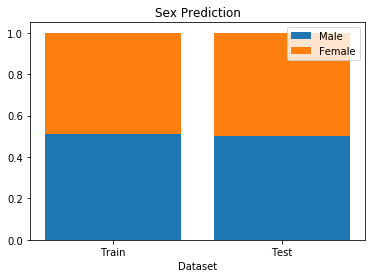

In [5]:
plt.bar([0, 1], male, label = 'Male')
plt.bar([0, 1], female, bottom = male, label = 'Female')
plt.xticks([0, 1], ['Train', 'Test'])
plt.xlabel("Dataset")
plt.title('Sex Prediction')
plt.legend();

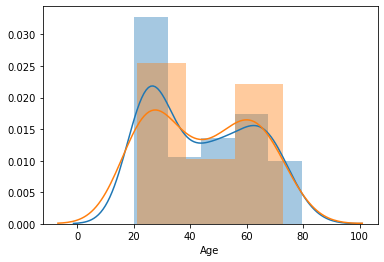

In [7]:
sns.distplot(train_labels_male)
sns.distplot(test_labels_male);

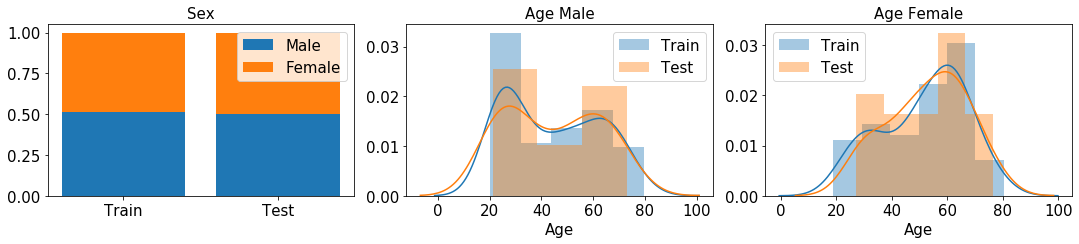

In [141]:
fs = 15
fig, ax = plt.subplots(1, 3, figsize = (15, 3.5))

ax[0].bar([0, 1], male, label = 'Male')
ax[0].bar([0, 1], female, bottom = male, label = 'Female')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Train', 'Test'])
#ax[0].axes.tick_params(labelsize = fs)
ax[0].set_title('Sex', size = fs)

sns.distplot(train_labels_male, ax = ax[1], label = 'Train')
sns.distplot(test_labels_male, ax = ax[1], label = 'Test')
ax[1].set_title('Age Male', size = fs)
ax[1].set_xlabel('Age', fontsize = fs)
ax[1].legend()

sns.distplot(train_labels_female, ax = ax[2], label = 'Train')
sns.distplot(test_labels_female, ax = ax[2], label = 'Test')
ax[2].set_title('Age Female', size = fs)
ax[2].set_xlabel('Age', size = fs)
ax[2].legend()

for i in range(3): 
    ax[i].axes.tick_params(labelsize = fs)
    ax[i].legend(prop={'size': fs})

plt.tight_layout()
plt.savefig('../plots/train_test_sets.png', dpi = 200);

# SVMs

In [14]:
from ml_functions import *
from classification_gridsearch import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
train_df_stand = StandardScaler().fit_transform(train_df_raw)
train_pcs = PCA(n_components=2).fit_transform(train_df_stand)

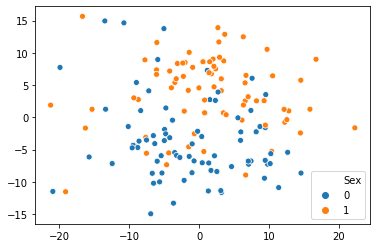

In [16]:
sns.scatterplot(train_pcs[:, 0], train_pcs[:, 1], hue = train_labels-1)

In [6]:
svm(train_pcs, train_labels, linearsvc=True)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


([({'C': 1, 'loss': 'hinge', 'penalty': 'l2'}, 0.7775595238095238),
  ({'C': 1, 'loss': 'squared_hinge', 'penalty': 'l2'}, 0.7708928571428572),
  ({'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'}, 0.7325),
  ({'C': 10, 'loss': 'hinge', 'penalty': 'l2'}, 0.7320833333333334),
  ({'C': 10000, 'loss': 'hinge', 'penalty': 'l2'}, 0.6976785714285715)],
 0.7828947368421053)

In [17]:
from sklearn.svm import SVC, LinearSVC, SVR

In [8]:
svmod0 = SVC(C = 1, kernel='linear')
svmod0.fit(train_pcs, train_labels)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [18]:
def svplot(svmod, ax = None, title = None, xlab = None, ylab = None, fs = 10):
    svmod.fit(train_pcs, train_labels)
    w0, w1 = svmod.coef_[0]
    b = svmod.intercept_[0]
    margin = 1/w1
    
    minx, maxx = min(train_pcs[:, 0]), max(train_pcs[:, 0])
    miny, maxy = min(train_pcs[:, 1]), max(train_pcs[:, 1])
    xax = np.linspace(minx, maxx, 50)
    
    if ax is None:
        plt.plot(xax, -(w0/w1)*xax - b/w1, '-k', alpha = .5, lw = 2)
        plt.plot(xax, -(w0/w1)*xax - b/w1 + margin, '--k', alpha = 0.5, lw = 2)
        plt.plot(xax, -(w0/w1)*xax - b/w1 - margin, '--k', alpha = 0.5, lw = 2)
        plt.plot(train_pcs[:, 0][train_labels == 1], train_pcs[:, 1][train_labels == 1], '.', markersize = 10)
        plt.plot(train_pcs[:, 0][train_labels == 2], train_pcs[:, 1][train_labels == 2], '.', markersize = 10)
        plt.xlim(minx-1, maxx+1)
        plt.ylim(miny-1, maxy+1)
    else:
        ax.plot(xax, -(w0/w1)*xax - b/w1, '-k', alpha = .5, lw = 2)
        ax.plot(xax, -(w0/w1)*xax - b/w1 + margin, '--k', alpha = 0.5, lw = 2)
        ax.plot(xax, -(w0/w1)*xax - b/w1 - margin, '--k', alpha = 0.5, lw = 2)
        ax.plot(train_pcs[:, 0][train_labels == 1], train_pcs[:, 1][train_labels == 1], '.', markersize = 10)
        ax.plot(train_pcs[:, 0][train_labels == 2], train_pcs[:, 1][train_labels == 2], '.', markersize = 10)
        ax.set_xlim(minx-1, maxx+1)
        ax.set_ylim(miny-1, maxy+1)
        ax.set_title(title, size = fs)
        ax.set_xlabel(xlab, size = fs)
        ax.set_ylabel(ylab, size = fs)
        ax.axes.tick_params(labelsize = fs)

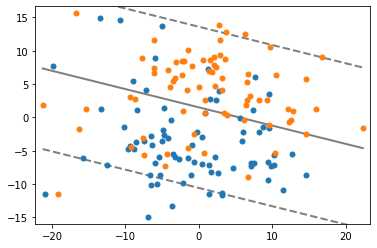

In [19]:
svplot(SVC(C = 0.0002, kernel= 'linear'))

In [12]:
def svregplot(svreg, xax = None, yax = None, ax = None, title = None, xlab = None, ylab = None, fs = 5):
    
    if xax is None and yax is None:
        xax = np.linspace(-1, 1, 100)
        yax = xax**2 + np.random.normal(scale = 0.1, size = 100)
    
    svreg.fit(xax.reshape(-1, 1), yax)
    #preds = svreg.predict(xax.reshape(-1, 1))
    
    minx, maxx = min(xax), max(xax)
    xaxis = np.linspace(minx, maxx, 50)
    preds = svreg.predict(xaxis.reshape(-1, 1))
    if ax is None:
        plt.plot(xaxis, preds, '-k', alpha = 0.5, lw = 2)
        plt.plot(xaxis, preds + svreg.epsilon, '--k', alpha = 0.5, lw = 2)
        plt.plot(xaxis, preds - svreg.epsilon, '--k', alpha = 0.5, lw = 2)
        plt.plot(xax, yax, '.',  markersize = 10)
    else:
        ax.plot(xaxis, preds, '-k', alpha = 0.5, lw = 2)
        ax.plot(xaxis, preds + svreg.epsilon, '--k', alpha = 0.5, lw = 2)
        ax.plot(xaxis, preds - svreg.epsilon, '--k', alpha = 0.5, lw = 2)
        ax.plot(xax, yax, '.',  markersize = 10)
        ax.set_title(title, size = fs)
        ax.set_xlabel(xlab, size = fs)
        ax.set_ylabel(ylab, size = fs)
        ax.axes.tick_params(labelsize = fs)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


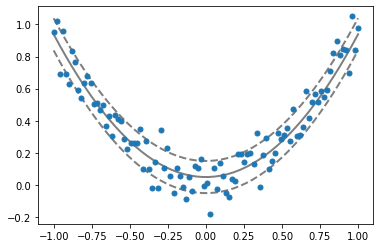

In [13]:
svregplot(SVR(kernel = 'poly', degree = 2, epsilon = 0.1, C = 1))

In [16]:
train_df_male_stand = StandardScaler().fit_transform(train_df_male)

In [13]:
cors = [np.abs(np.corrcoef(train_df_male_stand[:, i], train_labels_male)[0, 1]) for i in range(train_df_male.shape[1])]

In [14]:
pd.DataFrame({'cors':cors, 'var':train_df_male.columns }).sort_values('cors', ascending=False)[:10]

,cors,var
310,0.595970,Glucose 4
255,0.594471,Total cholesterol
114,0.578879,Sphingo-myelin C16:1
413,0.572772,unknown 0.94
316,0.563293,unknown 3.77
286,0.562762,Glucose 1
265,0.561580,LDL cholesterol
307,0.559214,Glucose 2
311,0.547969,Glucose 5
399,0.530383,unknown 1.20


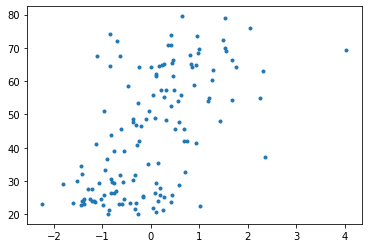

In [15]:
plt.plot(train_df_male_stand[:, 413], train_labels_male, '.')

In [280]:
from regression_gridsearch import svm

In [14]:
train_labels_male_stand = StandardScaler().fit_transform(np.array(train_labels_male).reshape(-1, 1))

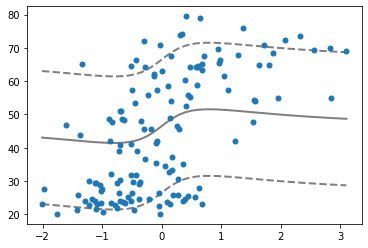

In [30]:
svregplot(SVR(kernel = 'sigmoid', C = 1, epsilon = 20), xax = train_df_male_stand[:, 310], yax = train_labels_male)

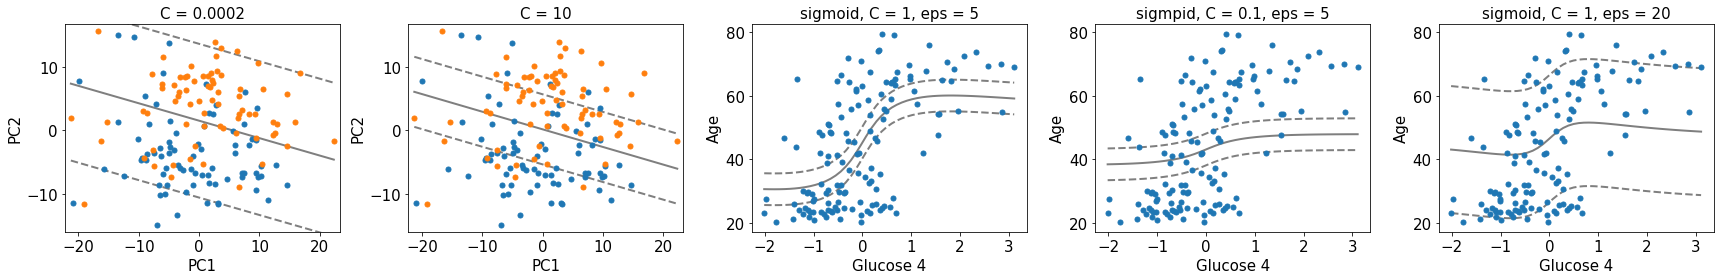

In [20]:
fig, ax = plt.subplots(1, 5, figsize = (24, 4))

svplot(SVC(kernel = 'linear', C = 0.0002), ax[0], 'C = 0.0002', 'PC1', 'PC2', 15)
svplot(SVC(kernel = 'linear', C = 10), ax[1], 'C = 10', 'PC1', 'PC2', 15)
svregplot(SVR(kernel = 'sigmoid', C = 1, epsilon = 5), train_df_male_stand[:, 310], train_labels_male, ax[2], 'sigmoid, C = 1, eps = 5', 'Glucose 4', 'Age', 15)
svregplot(SVR(kernel = 'sigmoid', C = 0.1, epsilon = 5), train_df_male_stand[:, 310], train_labels_male, ax[3], 'sigmpid, C = 0.1, eps = 5', 'Glucose 4', 'Age', 15)
svregplot(SVR(kernel = 'sigmoid', C = 1, epsilon = 20), train_df_male_stand[:, 310], train_labels_male, ax[4], 'sigmoid, C = 1, eps = 20', 'Glucose 4', 'Age', 15)

plt.tight_layout()
#plt.savefig('../plots/svms.png', dpi = 200)

/home/tomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.launch_new_instance()
/home/tomas/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


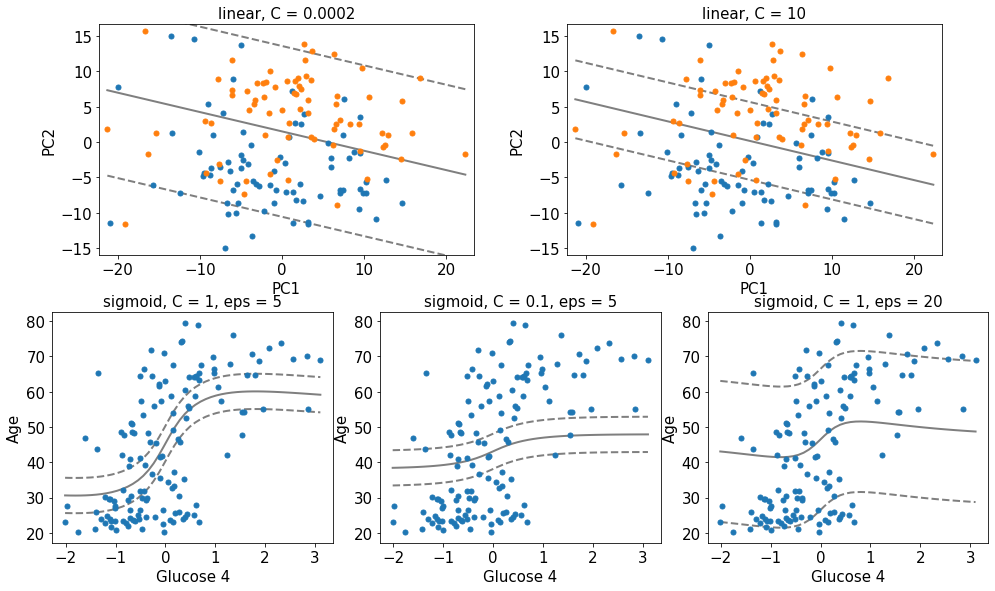

In [21]:
fig = plt.figure(figsize = (13, 8))
ax1 = fig.add_axes([0.05, 0.5, 0.4, 0.4]) # left, bottom, width, height
ax2 = fig.add_axes([0.55, 0.5, 0.4, 0.4])

ax3 = fig.add_axes([0, 0, 0.3, 0.4]) # left, bottom, width, height
ax4 = fig.add_axes([0.35, 0, 0.3, 0.4])
ax5 = fig.add_axes([0.7, 0, 0.3, 0.4])


svplot(SVC(kernel = 'linear', C = 0.0002), ax1, 'linear, C = 0.0002', 'PC1', 'PC2', 15)
svplot(SVC(kernel = 'linear', C = 10), ax2, 'linear, C = 10', 'PC1', 'PC2', 15)
svregplot(SVR(kernel = 'sigmoid', C = 1, epsilon = 5), train_df_male_stand[:, 310], train_labels_male, ax3, 'sigmoid, C = 1, eps = 5', 'Glucose 4', 'Age', 15)
svregplot(SVR(kernel = 'sigmoid', C = 0.1, epsilon = 5), train_df_male_stand[:, 310], train_labels_male, ax4, 'sigmoid, C = 0.1, eps = 5', 'Glucose 4', 'Age', 15)
svregplot(SVR(kernel = 'sigmoid', C = 1, epsilon = 20), train_df_male_stand[:, 310], train_labels_male, ax5, 'sigmoid, C = 1, eps = 20', 'Glucose 4', 'Age', 15)

plt.savefig('../plots/svms2.png', dpi = 200, bbox_inches = "tight")

# TREES

In [56]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [57]:
def classplot(model, ax = None, title = None, xlab = None, ylab = None):
    model.fit(train_pcs, train_labels)
    xax = np.linspace(min(train_pcs[:, 0]), max(train_pcs[:, 0]), 50)
    yax = np.linspace(min(train_pcs[:, 0]), max(train_pcs[:, 0]), 50)

    xax = np.repeat(xax, 50)
    yax = np.tile(yax, 50)

    test_df = np.array([xax, yax]).T
    
    pr = model.predict(test_df)
    
    if ax is None:
        plt.plot(xax[pr == 1], yax[pr == 1], '.', alpha = 0.7, markersize = 3, color = 'C0')
        plt.plot(xax[pr == 2], yax[pr == 2], '.', alpha = 0.7, markersize = 3, color = 'C1')
        plt.plot(train_pcs[:, 0][train_labels == 1], train_pcs[:, 1][train_labels == 1], '.', markersize = 15, alpha = 0.5)
        plt.plot(train_pcs[:, 0][train_labels == 2], train_pcs[:, 1][train_labels == 2], '.', markersize = 15, alpha = 0.5)
        plt.title(title)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
    else:
        ax.plot(xax[pr == 1], yax[pr == 1], '.', alpha = 0.7, markersize = 5, color = 'C0')
        ax.plot(xax[pr == 2], yax[pr == 2], '.', alpha = 0.7, markersize = 5, color = 'C1')
        ax.plot(train_pcs[:, 0][train_labels == 1], train_pcs[:, 1][train_labels == 1], '.', markersize = 10)
        ax.plot(train_pcs[:, 0][train_labels == 2], train_pcs[:, 1][train_labels == 2], '.', markersize = 10)
        ax.set_title(title)
        ax.set_xlabel(xlab)
        ax.set_ylabel(ylab)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


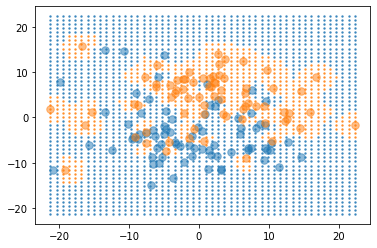

In [67]:
classplot(SVC(C = ))

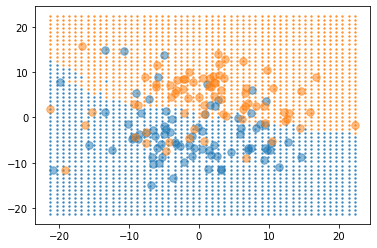

In [125]:
classplot(KNeighborsClassifier(n_neighbors = 20))

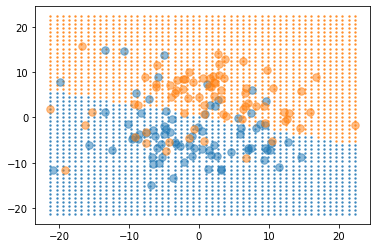

In [129]:
classplot(SVC(C = 1, kernel = 'linear'))

In [130]:
from regression_gridsearch import boost

In [133]:
boost(train_pcs, train_labels, mod = 'xgb')

/home/tomas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/home/tomas/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[22:02:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


([({'booster': 'gbtree',
    'colsample_bytree': 1.0,
    'learning_rate': 0.01,
    'max_depth': 2,
    'n_estimators': 1000,
    'n_jobs': -1,
    'reg_lambda': 50,
    'subsample': 0.4},
   0.21686228793441362),
  ({'booster': 'gbtree',
    'colsample_bytree': 1.0,
    'learning_rate': 0.01,
    'max_depth': 2,
    'n_estimators': 1000,
    'n_jobs': -1,
    'reg_lambda': 10,
    'subsample': 0.2},
   0.21553955628116275),
  ({'booster': 'gbtree',
    'colsample_bytree': 0.8,
    'learning_rate': 0.01,
    'max_depth': 2,
    'n_estimators': 1000,
    'n_jobs': -1,
    'reg_lambda': 10,
    'subsample': 0.2},
   0.2109574218961376),
  ({'booster': 'gbtree',
    'colsample_bytree': 0.6000000000000001,
    'learning_rate': 0.01,
    'max_depth': 2,
    'n_estimators': 1000,
    'n_jobs': -1,
    'reg_lambda': 10,
    'subsample': 0.2},
   0.2109574218961376),
  ({'booster': 'gbtree',
    'colsample_bytree': 0.4,
    'learning_rate': 0.01,
    'max_depth': 2,
    'n_estimators': 1000,


# Linear Discriminant Analysis

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
Xlda = LinearDiscriminantAnalysis(n_components=1).fit_transform(train_df_stand, train_labels)

/home/tomas/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


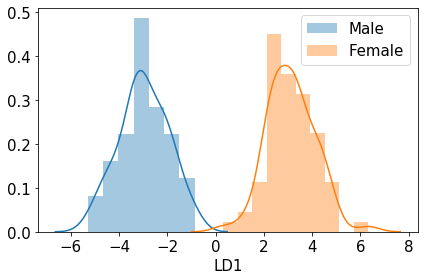

In [30]:
sns.distplot(Xlda[train_labels == 1], label = 'Male')
sns.distplot(Xlda[train_labels == 2], label = 'Female')
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xlabel('LD1', size = 15)
plt.savefig('../plots/lda.png', dpi = 150);

# Dimensionality reduction

In [95]:
from sklearn.cross_decomposition import PLSRegression

In [96]:
plsmod = PLSRegression().fit_transform(train_df_male_stand, train_labels_male)

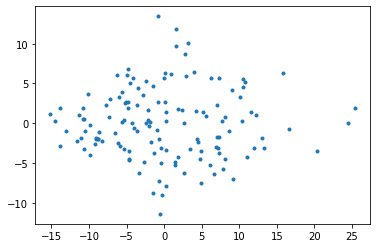

In [101]:
plt.plot(plsmod[0][:, 0], plsmod[0][:, 1], '.')

-----

In [9]:
from sklearn.metrics import r2_score

In [73]:
x = np.linspace(-5, 5, 50) 
y = x**3 + 20*np.random.randn(50) 

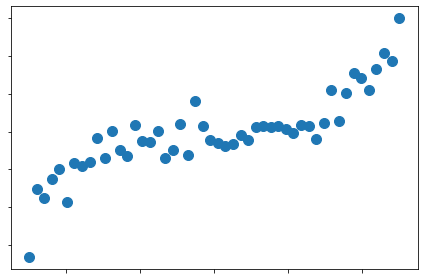

In [75]:
fig, ax = plt.subplots()
ax.plot(x, y, '.', markersize = 20)
ax.set_xticklabels([])
ax.set_yticklabels([])

plt.tight_layout()
plt.savefig('../plots/treefig.png')

In [12]:
r2_score(y, y[::-1])

-2.9999999999999996

In [79]:
a = np.random.rand(10)
print(np.mean(a))
print(np.mean(a**2))
print(np.sqrt(np.mean(a**2)))

0.5826638876078244
0.39700720274746626
0.6300850758012494


In [84]:
train_df_raw.loc[:, ['Arginine', 'Ornithine', 'Citrulline TMS4 (trace analyte)']]

,Arginine,Ornithine,Citrulline TMS4 (trace analyte)
0,84.245415,45.123976,383265
1,71.922290,46.206061,260950
2,112.723881,43.355365,399233
3,103.824627,66.055579,542892
4,103.055556,41.334940,364464
...,...,...,...
147,108.768657,69.327682,283732
148,68.029851,51.535622,473781
149,97.920011,58.980786,636576
150,112.060410,67.169277,711924


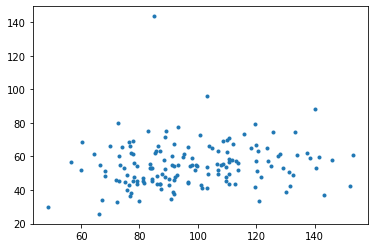

In [85]:
plt.plot(train_df_raw.loc[:, 'Arginine'], train_df_raw.loc[:, 'Ornithine'], '.')

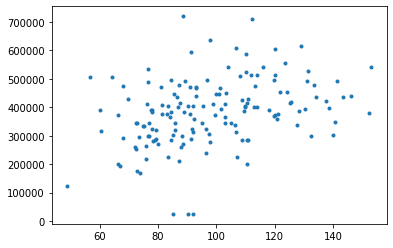

In [86]:
plt.plot(train_df_raw.loc[:, 'Arginine'], train_df_raw.loc[:, 'Citrulline TMS4 (trace analyte)'], '.')

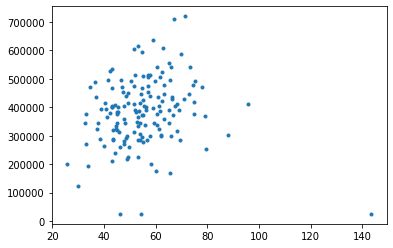

In [87]:
plt.plot(train_df_raw.loc[:, 'Ornithine'], train_df_raw.loc[:, 'Citrulline TMS4 (trace analyte)'], '.')

----

In [3]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../steps/rawdf.csv')
df = df.iloc[:, 4:]
df = df.dropna()
df = StandardScaler().fit_transform(df)

In [4]:
correlations = np.empty((df.shape[1], df.shape[1]))
for i in range(df.shape[1]):
    for j in range(df.shape[1]):
        correlations[i, j] = np.abs(np.corrcoef(df[:, i], df[:, j])[0, 1])

In [ ]:
#pd.DataFrame(correlations).to_csv('correlations.csv')

In [112]:
train_df_raw.columns[370:]

Index(['unknown 2.30', 'unknown 2.29', 'unknown 2.28', 'unknown 2.25',
       'unknown 2.18', 'unknown 2.17', 'unknown 2.16', 'unknown 2.14',
       'unknown 2.13', 'unknown 2.12', 'unknown 2.09', 'unknown 2.05',
       'unknown 1.97', 'unknown 1.93', 'unknown 1.92', 'unknown 1.91',
       'unknown 1.77', 'unknown 1.74', 'unknown 1.72', 'unknown 1.71',
       'unknown 1.55', 'Alanine.1', 'unknown 1.43', 'unknown 1.41',
       'unknown 1.34', 'unknown 1.27', 'unknown 1.26', 'unknown 1.23',
       'unknown 1.21', 'unknown 1.20', 'unknown 1.19', 'unknown 1.17',
       'unknown 1.16', 'unknown 1.13', 'unknown 1.09', 'unknown 1.08',
       'Valine 1', 'Isoleucine.1', 'Valine 2', 'unknown 0.99', 'Leucine 1',
       'Leucine 2', 'unknown  0.95', 'unknown 0.94', 'unknown 0.93',
       'unknown 0.88', 'unknown 0.81', 'myristic acid', 'myristoleic acid',
       'penta-decylic acid', 'palmitic acid', 'palmitoleic acid',
       'branched chain fatty acid', 'margaric acid', 'stearic acid',
       '

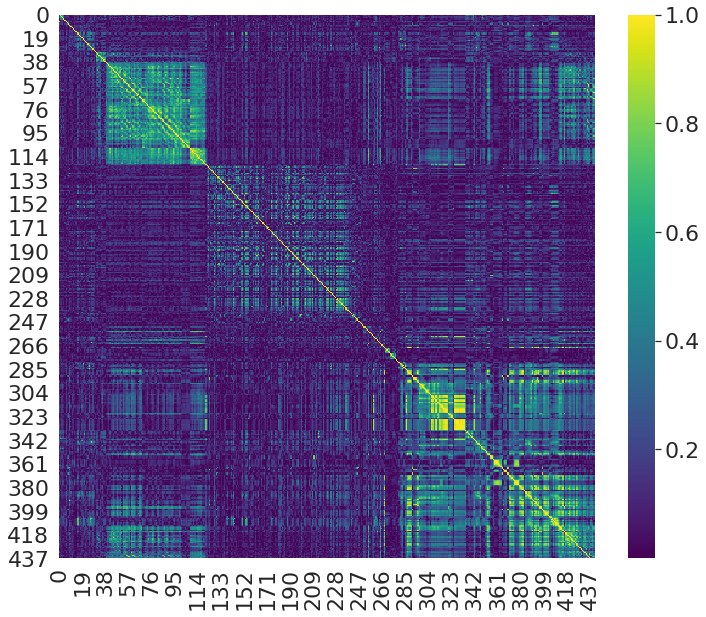

In [113]:
plt.figure(figsize = (12, 10))
sns.heatmap(correlations[:, :], cmap = 'viridis')

In [121]:
from mpl_toolkits.mplot3d import Axes3D